In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [12]:
conda install -c anaconda pandas-profiling

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Sony\Anaconda3

  added / updated specs:
    - pandas-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anaconda-2019.03           |           py37_0          11 KB  anaconda
    ca-certificates-2019.1.23  |                0         158 KB  anaconda
    certifi-2019.3.9           |           py37_0         155 KB  anaconda
    conda-4.7.12               |           py37_0         3.0 MB  anaconda
    openssl-1.1.1b             |       he774522_1         5.7 MB  anaconda
    pandas-profiling-1.4.1     |           py37_0          39 KB  anaconda
    ------------------------------------------------------------
                                           Total:         9.1 MB

The following NEW packages will be INSTALLED:

  pandas-profiling   anaconda/win-64::pandas-profiling-1.4.1-py37_0




==> WARNING: A newer version of conda exists. <==
  current version: 4.7.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda




In [13]:
import pandas_profiling

### Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data.head()
#Данные представляют собой временной ряд (индекс и числовые значения)

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [3]:
data.describe()
#В выборке 119 тыс наблюдений. Значения в выборке от 1014 до 3054 мвт
#Средняя 1630 мвт, что говорит о смещенном распределении

#50% выборки ледит на интервале от 1444 до 1819 мвт
#Порядок разметки часовой

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


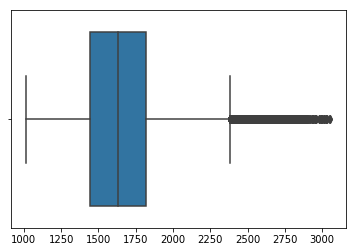

In [4]:
sns.boxplot(data.values)
#На графике видно смещение распределения.
#Выбросы определены выше значения 2300 мвт.

In [15]:
data['DUQ_MW'] = data['DUQ_MW'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null int32
dtypes: int32(1)
memory usage: 1.4 MB


In [5]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

#Пропусков нет

0

Text(0, 0.5, 'МВт')

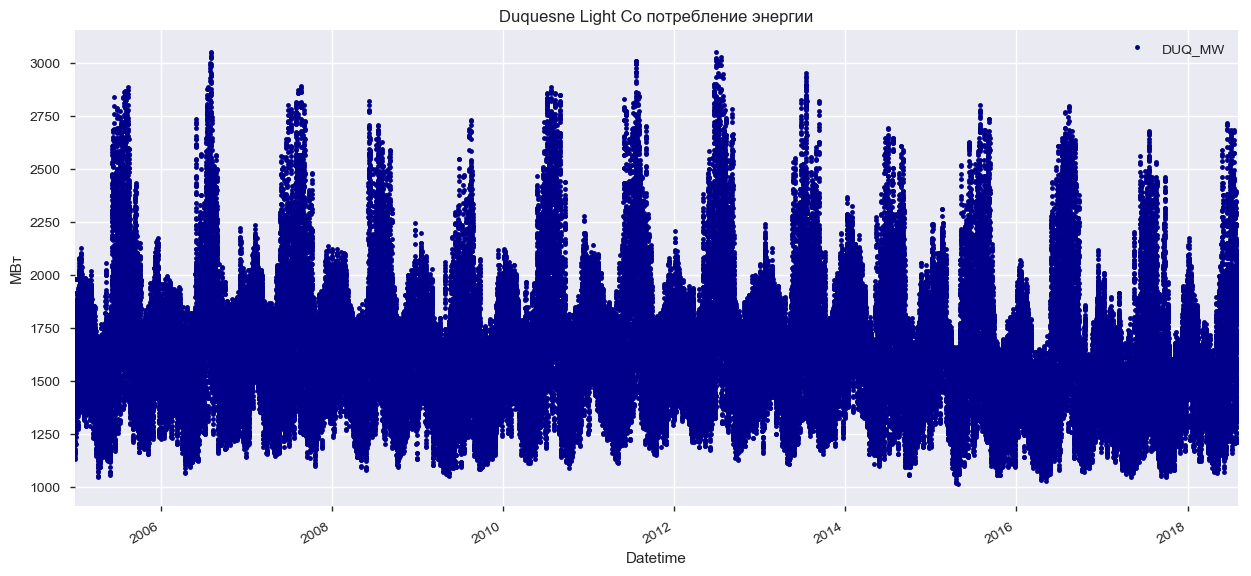

In [16]:
data.plot( style = '.',color = 'darkblue', figsize = ( 15, 7 ), title = 'Duquesne Light Co потребление энергии' )
plt.ylabel ( 'МВт' )

#### Визуально видно что данные имеют, как минимум, годовую цикличность
#### Кроме того, видны глобальные колебания в потреблении электроэнергии, что, скорее всеро связано с экономическими и социальными явлениями

In [17]:
pandas_profiling.ProfileReport(data)

#Обзор данных показал ту же картину

Number of variables,2
Number of observations,119068
Total Missing (%),0.0%
Total size in memory,1.4 MiB
Average record size in memory,12.0 B
Numeric,1
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [18]:
data_m = data.resample("M").sum()

Text(0, 0.5, 'МВт')

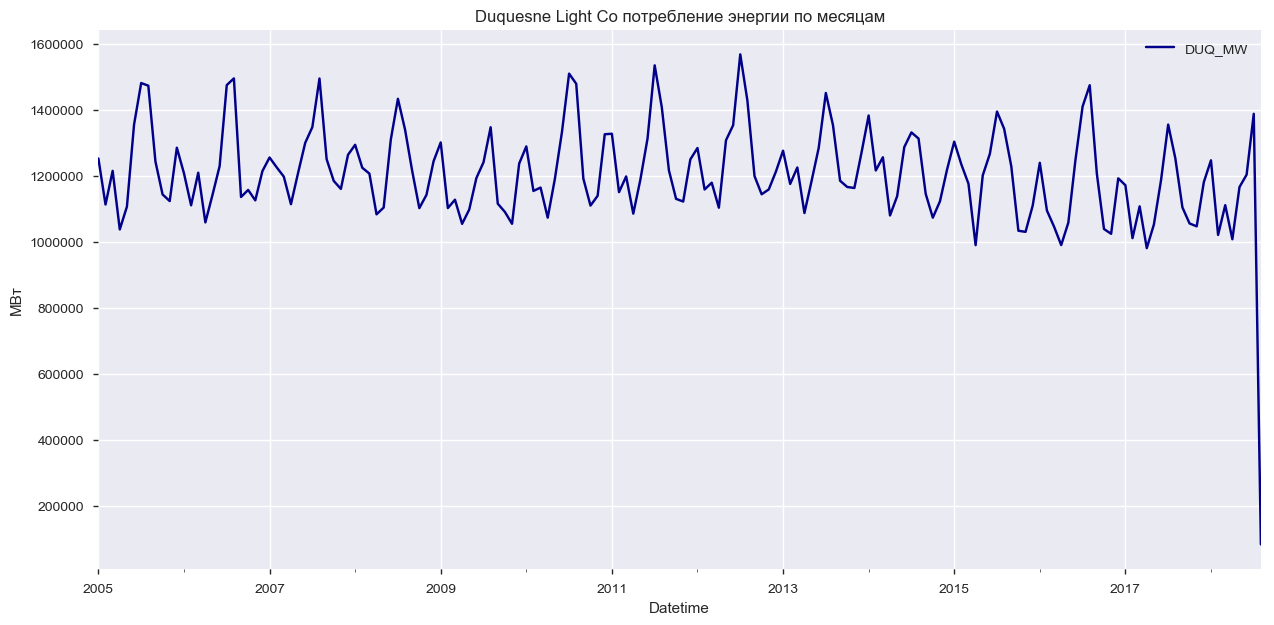

In [20]:
data_m.plot( style = '-',color = 'darkblue', figsize = ( 15, 7 ), title = 'Duquesne Light Co потребление энергии по месяцам' )
plt.ylabel ( 'МВт' )

#### При агрегации данных потребления по месяцам, более явно видно сезонность потребления электроэнергии
#### Падение вниз последнего значения связано с тем, что в расет взят не полный месяц

### Прочитайте базу Brent и сделайте ее перрасчет (ресемплинг) в представление по неделям , по месяцам.

In [21]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head(3)

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37


Text(0.5, 0, 't')

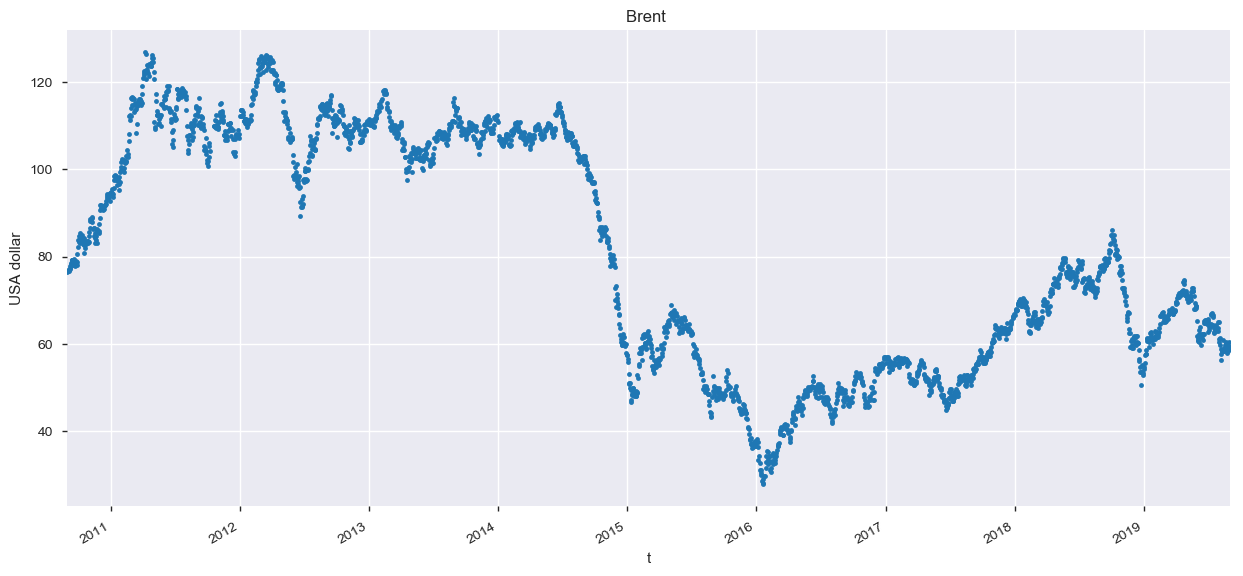

In [25]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [31]:
brent_week = brent_data.resample("W").mean()

In [32]:
brent_week.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [33]:
brent_m = brent_data.resample("M").mean()

In [34]:
brent_m.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


Text(0.5, 0, 't')

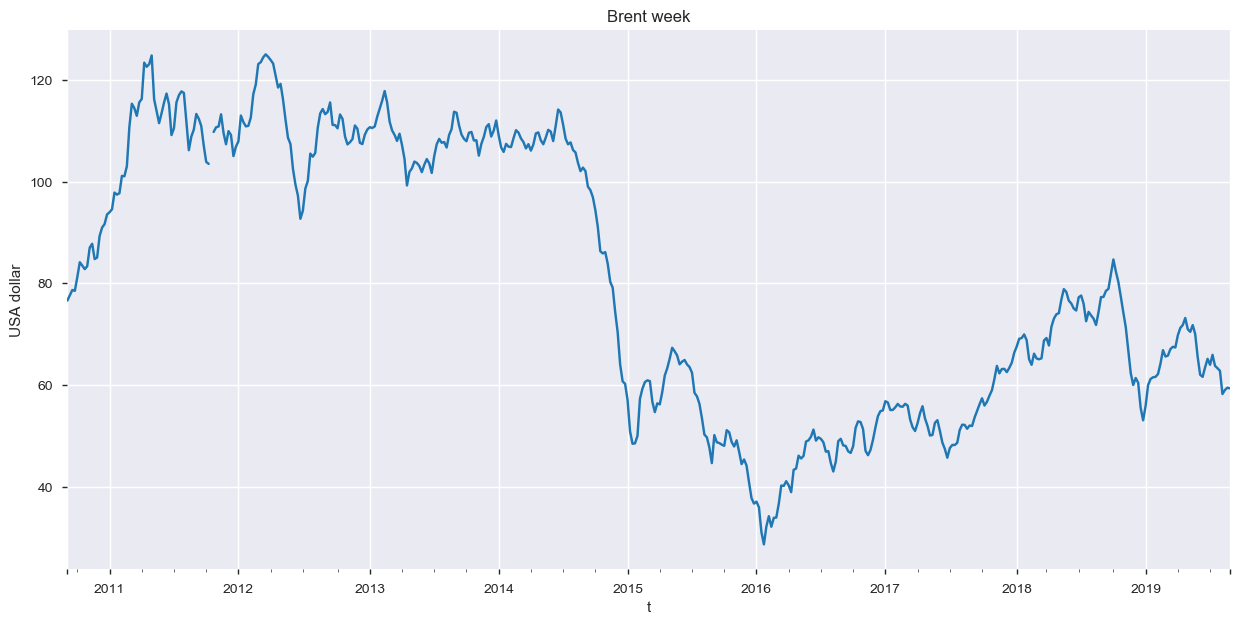

In [35]:
_ = brent_week['Значение'].plot( style='-', figsize=( 15, 7 ), title='Brent week')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

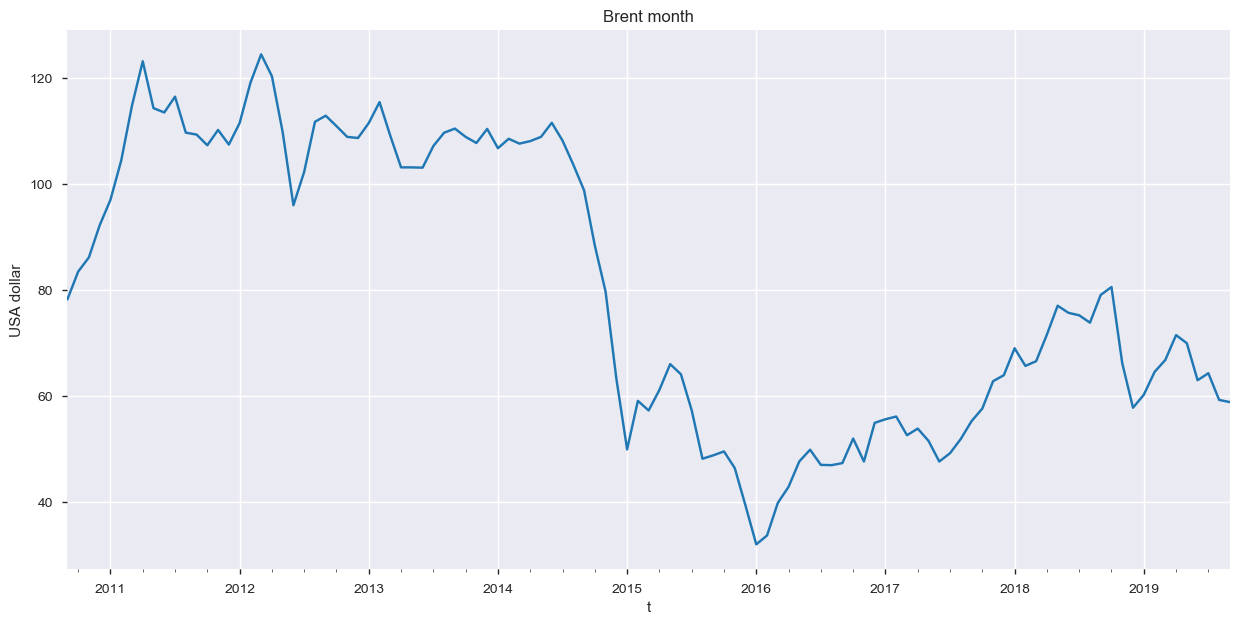

In [36]:
_ = brent_m['Значение'].plot( style='-', figsize=( 15, 7 ), title='Brent month')
plt.ylabel('USA dollar')
plt.xlabel('t')

### Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [37]:
brent_week_std = brent_data.resample("W").std()


In [38]:
brent_week_std.head()

,Значение
Дата,
2010-09-05,0.185688
2010-09-12,0.649759
2010-09-19,0.539728
2010-09-26,0.596068
2010-10-03,2.408588


In [39]:
brent_m_std = brent_data.resample("M").std()
brent_m_std.head()

,Значение
Дата,
2010-09-30,1.294269
2010-10-31,0.898559
2010-11-30,1.753625
2010-12-31,1.443311
2011-01-31,1.842147


In [41]:
brent_y = brent_data.resample("Y").mean()
brent_y_std = brent_data.resample("Y").std()

Text(0, 0.5, 'Brent by years')

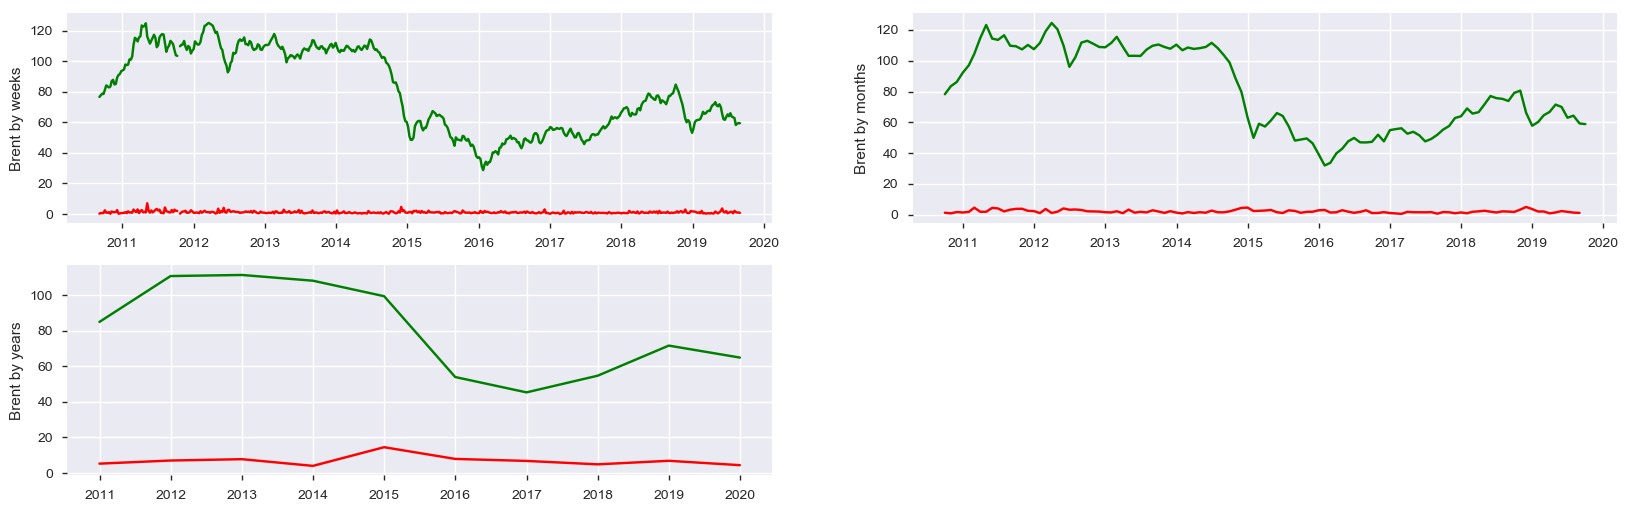

In [42]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(brent_week.index, brent_week['Значение'].values, 'g')
plt.plot(brent_week_std.index, brent_week_std['Значение'].values, 'r')
plt.ylabel('Brent by weeks')

plt.subplot(2,2,2)
plt.plot(brent_m.index, brent_m['Значение'].values, 'g')
plt.plot(brent_m_std.index, brent_m_std['Значение'].values, 'r')
plt.ylabel('Brent by months')

plt.subplot(2,2,3)
plt.plot(brent_y.index, brent_y['Значение'].values, 'g')
plt.plot(brent_y_std.index, brent_y_std['Значение'].values, 'r')
plt.ylabel('Brent by years')

### Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

#### Агрегирование временных данных позволяет сгладить мелкие колебания во времени. 
#### С одной стороны, это позволяет выявить тренды, циклы, дает возможность экстраполировать данный и стрить прогнозы.
#### С другой стороны, характер колебаний цен в разрезе недель, может дать понимание, что происходило, и какие факторы в прошлом оказывали влияние на рост и падение цен. Т.е. погружение в мелкие детали, позволяет более точно предсказывать будущее.